<a href="https://colab.research.google.com/github/jaehyun0220/DL/blob/master/Git_Temp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !pip install scikit-learn --upgrade

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
# 데이터 활용에 필요한 기본 패키지 로딩
import sys #access to system parameters 
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import tensorflow as tf
print("tensorflow version: {}".format(tf.__version__))

import os

Python version: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
pandas version: 1.1.5
scikit-learn version: 0.24.2
NumPy version: 1.19.5
tensorflow version: 2.4.1


In [129]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from scipy import stats

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, r2_score
from sklearn import model_selection

# height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168, 198, 170, 170, 198, 170, 165, 193, 142, 137, 155, 165, 147, 170, 140, 165, 132, 137, 165, 165, 180, 168, 142, 193, 165, 142, 165, 137, 165, 160, 160, 165, 165, 165, 163, 170, 165, 155, 165, 165, 160, 163, 135, 165, 142, 193, 171, 162, 198, 190, 163, 150, 168, 168, 193, 170]
# weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69, 98, 77, 70, 90, 71, 70, 73, 59, 68, 86, 84, 67, 70, 86, 70, 75, 70, 68, 68, 77, 64, 86, 70, 82, 88, 98, 86, 63, 68, 66, 73, 66, 70, 74, 69, 70, 64, 66, 68, 64, 77, 70, 62, 79, 68, 56, 79, 82, 80, 77, 73, 82, 61, 80, 73]

height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]

# DataFrame 만들기

body = pd.DataFrame(
    {'height': height, 'weight': weight}
)

In [99]:
body.info

<bound method DataFrame.info of     height  weight
0      170      70
1      168      66
2      177      73
3      181      77
4      172      74
..     ...     ...
74     150      73
75     168      82
76     168      61
77     193      80
78     170      73

[79 rows x 2 columns]>

In [118]:
# body = body[(body['height']<190) & (body['height']>150)]
# body

,height,weight
0,170,70
1,168,66
2,177,73
3,181,77
4,172,74
5,171,73
6,169,69
7,175,79
8,174,77
9,178,80


In [131]:
body_shuffled=body.sample(frac=1).reset_index(drop=True)

In [143]:
split_point = round(len(body)*0.7)
split_point

17

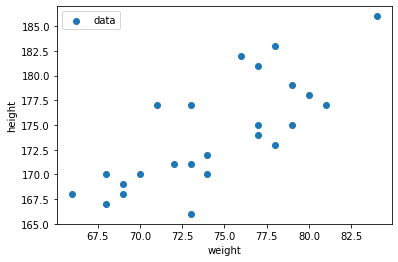

In [144]:
# 산점도(scatter) 그리기

import matplotlib.pylab as plt

plt.scatter( body_shuffled['weight'], body_shuffled['height'], label = "data")

plt.legend(loc = "best")
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [145]:
# Train & Test set 분리
train_x = body_shuffled['height'][:split_point]
test_x = body_shuffled['height'][split_point:]
train_y = body_shuffled['weight'][:split_point]
test_y = body_shuffled['weight'][split_point:]

train_x = train_x.values.reshape(-1,1)
test_x = test_x.values.reshape(-1,1)

all_x = np.vstack((train_x, test_x))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)

LinearRegression()

In [149]:
def regr_model_summary(regr, data_x, real_y):
  # Make predictions using the testing set
  pred_y = regr.predict(data_x)

  # The coefficientsbb
  print('Coefficients: ', regr.coef_, "\t Intercept: ", regr.intercept_)
  # The mean squared error
  # print('Mean Squared Log Error: %.2f'% mean_squared_log_error(test_y, pred_y))
  print('Mean Absolute Percentage Error: %.2f'% mean_absolute_percentage_error(real_y, pred_y))
  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination: %.2f'% r2_score(real_y, pred_y))

  params = np.append(regr.intercept_,regr.coef_)
  print("params =", params)


  new_x = np.append(np.ones((len(data_x),1)), data_x, axis=1)
  # print("test_x sample : ", data_x[:5])
  # print("new_x sample : ", new_x[:5])

  print("test_x shape is ", data_x.shape, "new_x shape is ", new_x.shape)
  MSE = (sum((real_y-pred_y)**2))/(len(new_x)-len(test_x[0])) # divides by the number of samples n-p where p is the number of features

  # print("len(new_x) : ", len(new_x), "len(test_x[0]): ", len(data_x[0]))

  # Note if you don't want to use a DataFrame replace the two lines above with
  # newX = np.append(np.ones((len(X),1)), X, axis=1)
  # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

  var_b = MSE*(np.linalg.inv(np.dot(new_x.T,new_x)).diagonal()) # calculate variance
  sd_b = np.sqrt(var_b) # calculate standard deviation
  ts_b = params/ sd_b # calcluate t-value

  print("variance : ", var_b, "standard deviation ", sd_b, "t_value: ", ts_b)

  # print("new_x : ", new_x, "new_x[0]: ", new_x[0], "new_x.shape: ", new_x.shape)


  # p_values =[2*(1-stats.t.cdf(np.abs(i),(len(new_x)-len(new_x[0])))) for i in ts_b]
  p_values =[2*(1-stats.t.cdf(np.abs(i),(len(new_x)-len(data_x[0])))) for i in ts_b]

  sd_b = np.round(sd_b,3)
  ts_b = np.round(ts_b,3)
  p_values = np.round(p_values,3)
  params = np.round(params,4)

  myDF3 = pd.DataFrame()
  myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["p_values"] = [params,sd_b,ts_b,p_values]
  # to print summary table:
  print("\n=========== SUMMARY ===========")
  print(myDF3)

  return pred_y

In [151]:
pred_y = regr_model_summary(regr, test_x, test_y)

Coefficients:  [0.62160778] 	 Intercept:  -33.069124423963146
Mean Absolute Percentage Error: 0.04
Coefficient of determination: 0.30
params = [-33.06912442   0.62160778]
test_x shape is  (7, 1) new_x shape is  (7, 2)
variance :  [2.04850708e+03 6.86033919e-02] standard deviation  [45.26043618  0.26192249] t_value:  [-0.73064087  2.37325087]

=========== SUMMARY ===========
   Coefficients  Standard Errors  t values  p_values
0      -33.0691           45.260    -0.731     0.493
1        0.6216            0.262     2.373     0.055


In [97]:
params = np.append(regr.intercept_,regr.coef_)
print("params =", params)

# Make predictions using the testing set
pred_y = regr.predict(test_x)

# new_x = pd.DataFrame({"Constant":np.ones(len(test_x))}).join(pd.DataFrame(test_x))
# MSE = (sum((test_y-pred_y)**2))/(len(new_x)-len(new_x.columns))

new_x = np.append(np.ones((len(test_x),1)), test_x, axis=1)
print("test_x sample : ", test_x[:5])
print("new_x sample : ", new_x[:5])

print("test_x shape is ", test_x.shape, "new_x shape is ", new_x.shape)
MSE = (sum((test_y-pred_y)**2))/(len(new_x)-len(test_x[0])) # divides by the number of samples n-p where p is the number of features

print("len(new_x) : ", len(new_x), "len(test_x[0]): ", len(test_x[0]))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(new_x.T,new_x)).diagonal()) # calculate variance
sd_b = np.sqrt(var_b) # calculate standard deviation
ts_b = params/ sd_b # calcluate t-value

print("variance : ", var_b, "standard deviation ", sd_b, "t_value: ", ts_b)

# print("new_x : ", new_x, "new_x[0]: ", new_x[0], "new_x.shape: ", new_x.shape)


# p_values =[2*(1-stats.t.cdf(np.abs(i),(len(new_x)-len(new_x[0])))) for i in ts_b]
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(new_x)-len(test_x[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["p_values"] = [params,sd_b,ts_b,p_values]
# to print summary table:
print("\n=========== SUMMARY ===========")
print(myDF3)

params = [33.12792027  0.21407704]
test_x sample :  [[137]
 [147]
 [198]
 [165]
 [165]]
new_x sample :  [[  1. 137.]
 [  1. 147.]
 [  1. 198.]
 [  1. 165.]
 [  1. 165.]]
test_x shape is  (36, 1) new_x shape is  (36, 2)
len(new_x) :  36 len(test_x[0]):  1
variance :  [4.50154512e+02 1.61004906e-02] standard deviation  [21.21684501  0.12688771] t_value:  [1.5613971  1.68713773]

=========== SUMMARY ===========
   Coefficients  Standard Errors  t values  p_values
0       33.1279           21.217     1.561     0.127
1        0.2141            0.127     1.687     0.100


Coefficients: 
 [0.62160778] 	 Intercept:  -33.069124423963146
Mean Absolute Percentage Error: 0.04
Coefficient of determination: 0.30


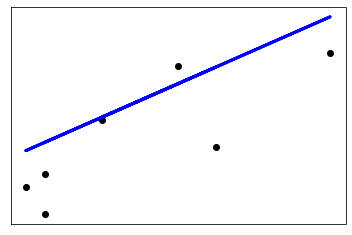

In [152]:
# The coefficientsbb
print('Coefficients: \n', regr.coef_, "\t Intercept: ", regr.intercept_)
# The mean squared error
# print('Mean Squared Log Error: %.2f'% mean_squared_log_error(test_y, pred_y))
print('Mean Absolute Percentage Error: %.2f'% mean_absolute_percentage_error(test_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(test_y, pred_y))

# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, pred_y, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [67]:
train_x.shape

(54, 1)

In [47]:
# body dataset을 scaling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(all_x)
body_standardScaled_x = standardScaler.transform(all_x)
body_standardScaled_x

array([[-0.00783886],
       [ 1.46194717],
       [-0.18421318],
       [ 1.46194717],
       [-0.00783886],
       [ 1.75590438],
       [-1.94795642],
       [ 1.28557285],
       [-0.18421318],
       [-0.30179607],
       [-0.30179607],
       [-0.94850192],
       [ 1.75590438],
       [ 0.10974402],
       [-0.00783886],
       [-0.7721276 ],
       [ 1.75590438],
       [-0.94850192],
       [-0.18421318],
       [-0.18421318],
       [-0.00783886],
       [-0.18421318],
       [-0.00783886],
       [ 1.46194717],
       [-0.12542174],
       [-0.30179607],
       [-0.30179607],
       [-0.18421318],
       [-0.47817039],
       [-0.47817039],
       [-1.0660848 ],
       [ 1.28557285],
       [-0.71333615],
       [-1.65399922],
       [-0.41937895],
       [-0.36058751],
       [ 1.75590438],
       [ 0.10974402],
       [ 1.28557285],
       [-0.47817039],
       [-1.53641633],
       [-0.00783886],
       [ 1.75590438],
       [-0.47817039],
       [-1.24245913],
       [ 0

In [49]:
print(np.mean(body_standardScaled_x, axis=0))

[4.45322791e-16]


In [51]:
body_standardScaled_x[:,0][split_point:]

array([-0.30179607, -0.00783886, -0.30179607, -1.53641633,  0.10974402,
       -0.18421318,  1.46194717, -1.83037354,  1.46194717,  1.28557285,
       -0.47817039, -0.00783886,  1.75590438, -0.36058751, -0.18421318,
       -1.83037354, -0.18421318, -0.00783886, -1.53641633, -0.18421318,
       -0.18421318, -1.53641633,  1.75590438,  1.46194717, -0.7721276 ,
       -0.18421318, -0.30179607, -0.18421318, -0.00783886,  1.28557285,
        1.75590438,  1.46194717,  0.69765844, -2.12433075,  0.10974402,
       -0.18421318])

Coefficients: 
 [4.86812275] Intercept:  70.42436764166038
Mean Squared Log Error: 0.03
Mean Absolute Percentage Error: 0.14
Coefficient of determination: 0.01


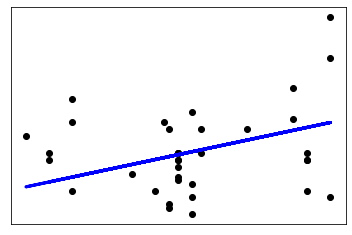

In [52]:
# Train & Test set 분리
train_x = body_standardScaled_x[:,0][:split_point]
test_x = body_standardScaled_x[:,0][split_point:]
train_y = body_shuffled['weight'][:split_point]
test_y = body_shuffled['weight'][split_point:]

train_x = train_x.reshape(-1,1)
test_x = test_x.reshape(-1,1)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the testing set
pred_y = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_, "Intercept: ", regr.intercept_)
# The mean squared error
print('Mean Squared Log Error: %.2f'% mean_squared_log_error(test_y, pred_y))
print('Mean Absolute Percentage Error: %.2f'% mean_absolute_percentage_error(test_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(test_y, pred_y))

# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, pred_y, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()